In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## KL Div for density modeling

In [5]:
# observed probability density X=[0, 10]; normalized.
# 
obs = np.array([0.001, 0.02, 0.047, 0.12, 0.16, 0.17, 0.14, 0.075, 0.096, 0.0902, 0.0808])
obs /= obs.sum() 
obsProb = obs 
print(obsProb)

[0.001  0.02   0.047  0.12   0.16   0.17   0.14   0.075  0.096  0.0902
 0.0808]


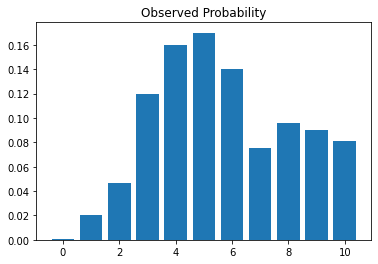

In [6]:
plt.bar(np.arange(len(obsProb)), obsProb);
plt.title("Observed Probability");

Question: What distribution model would be good for this observed distribution?

Let's model this observed distribution with a binomial distribution with $n=10$ and $\theta = Pr[H]$, where $\theta$ is unknown.

Then KL div provides a distance function with respect to $\theta$ so that we may obtain an optimal $\theta$ for our model.

In [7]:
# Now formulate it and solve it.

## KL Div of two Gaussians

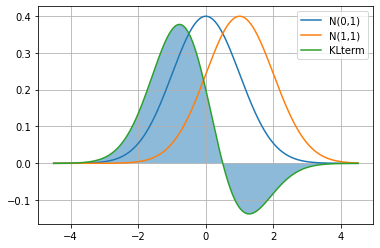

In [14]:
import scipy.stats as stats 
x=np.linspace(-4.5, 4.5, 1000)  # grid points
p = stats.norm(0,1).pdf(x)      # N(0, 1)
q = stats.norm(1,1).pdf(x)      # N(1, 1)

klterm = p * np.log(p/q)        # before integration

plt.plot(x, p, label="N(0,1)"); plt.plot(x, q, label="N(1,1)");
plt.plot(x, klterm, label="KLterm"); 
plt.fill_between(x, klterm, alpha=.5); plt.legend(); plt.grid(True);

KL div is not symmetric.

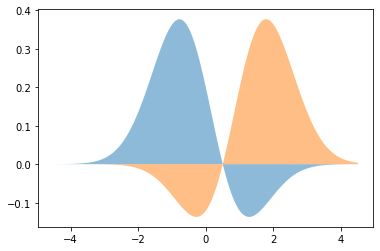

In [15]:
plt.fill_between(x, klterm, alpha=.5)
klqp = q * np.log(q/p)  # DKL(q||p) \neq DKL(p||q)
plt.fill_between(x, klqp, alpha=.5)

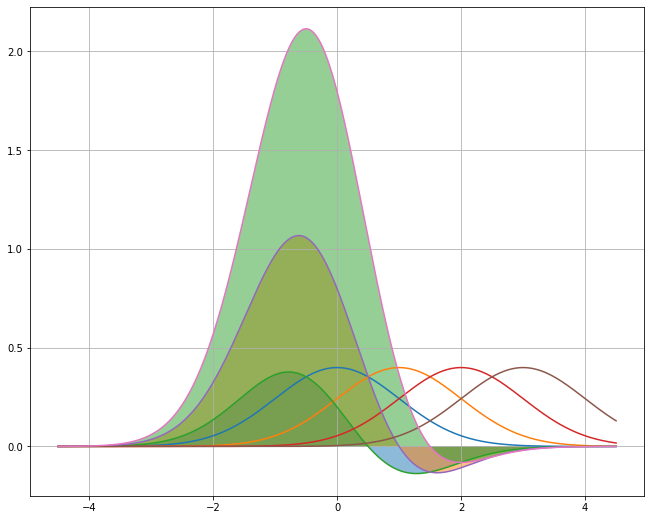

In [17]:
import scipy.stats as stats 
x=np.linspace(-4.5, 4.5, 1000)
means = [1, 2, 3 ] # various mean locations
p = stats.norm(0,1).pdf(x)
plt.figure(figsize=(11,9))
plt.plot(x, p, label="N(0,1)")
for m in means:
    q = stats.norm(m, 1).pdf(x)

    klterm = p * np.log(p/q)

    plt.plot(x, q);
    plt.plot(x, klterm)
    plt.fill_between(x, klterm, alpha=.5)
plt.grid(True);